### ARIMA models don't tend to work well with financial data

#### AutoRegressive Integrated MA

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../csv/monthly-milk-production-pounds-p.csv')

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [6]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [8]:
df.drop(168, axis=0, inplace=True)

In [9]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [12]:
df.set_index('Month', inplace=True)

In [13]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [14]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


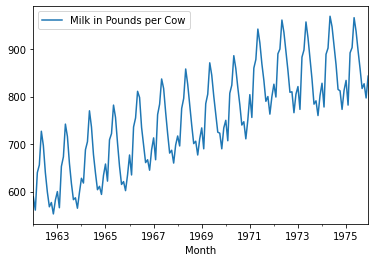

In [16]:
df.plot()

In [17]:
time_series = df['Milk in Pounds per Cow']

In [18]:
type(time_series)

pandas.core.series.Series

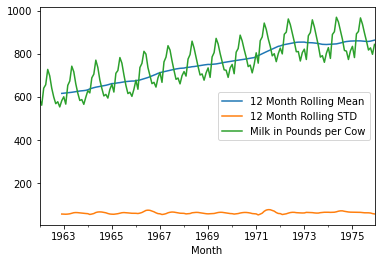

In [19]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot()
plt.legend()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
decomp = seasonal_decompose(time_series)

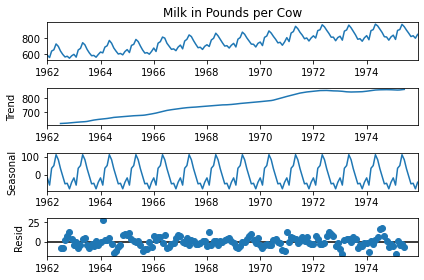

In [22]:
decomp.plot();

In [23]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df['Milk in Pounds per Cow'])

In [26]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented adfiller test")
    labels= ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
    
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [27]:
adf_check(df['Milk in Pounds per Cow'])

Augmented adfiller test
ADF Test Statistic : -1.3038115874221246
p-value : 0.627426708603034
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [28]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

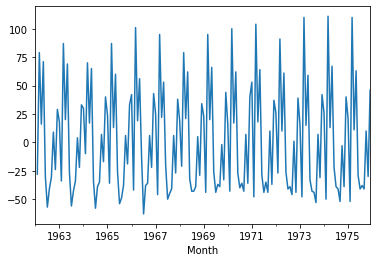

In [29]:
df['First Difference'].plot()

In [32]:
adf_check(df['First Difference'].dropna())

Augmented adfiller test
ADF Test Statistic : -3.0549955586530553
p-value : 0.03006800400178688
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [33]:
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [34]:
adf_check(df['Milk Second Difference'].dropna())

Augmented adfiller test
ADF Test Statistic : -14.327873645603336
p-value : 1.1126989332083069e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


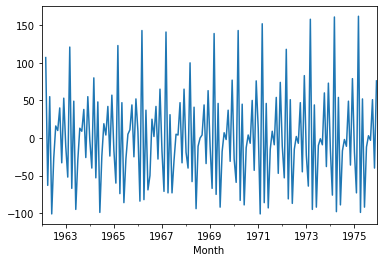

In [35]:
df['Milk Second Difference'].plot()

In [36]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

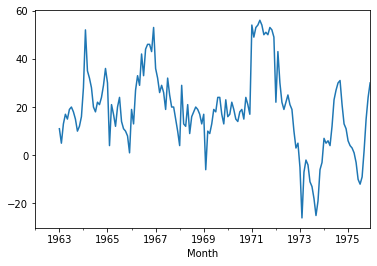

In [37]:
df['Seasonal Difference'].plot()

In [40]:
adf_check(df['Seasonal Difference'].dropna())

Augmented adfiller test
ADF Test Statistic : -2.3354193143593993
p-value : 0.16079880527711304
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [41]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

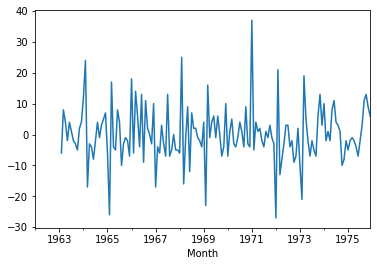

In [42]:
df['Seasonal First Difference'].plot()

In [43]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented adfiller test
ADF Test Statistic : -5.038002274921985
p-value : 1.86542343187882e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

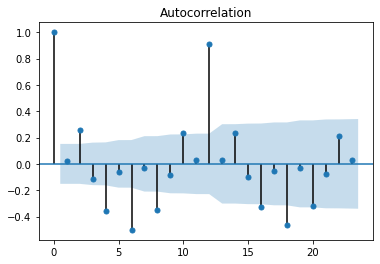

In [45]:
fig_first = plot_acf(df['First Difference'].dropna())

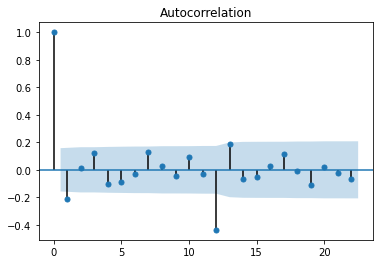

In [46]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [47]:
from pandas.plotting import autocorrelation_plot

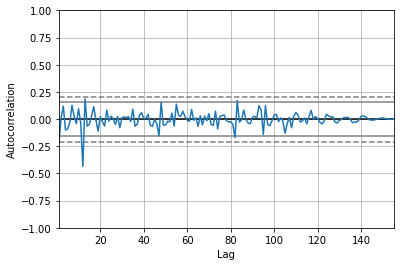

In [48]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())